No. of positive samples 5251
No. of negative samples 5251
Total no. of samples 10502
Found 17017 unique tokens
Shape of data tensor: (10502, 50)
Shape of labels tensor: (10502,)
Found 400000 word vectors:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                6208      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 326,273
Trainable params: 326,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


296/296 [==============================] - 7s 17ms/step - loss: 0.6142 - acc: 0.6804 - f1: 0.6482 - val_loss: 0.5332 - val_acc: 0.7536 - val_f1: 0.7671
Epoch 2/20
296/296 [==============================] - 5s 16ms/step - loss: 0.4286 - acc: 0.8213 - f1: 0.8040 - val_loss: 0.3358 - val_acc: 0.8677 - val_f1: 0.8436
Epoch 3/20
296/296 [==============================] - 5s 16ms/step - loss: 0.2923 - acc: 0.8854 - f1: 0.8776 - val_loss: 0.2445 - val_acc: 0.9096 - val_f1: 0.8997
Epoch 4/20
296/296 [==============================] - 5s 16ms/step - loss: 0.2307 - acc: 0.9075 - f1: 0.8998 - val_loss: 0.2165 - val_acc: 0.9096 - val_f1: 0.8996
Epoch 5/20
296/296 [==============================] - 5s 18ms/step - loss: 0.1984 - acc: 0.9239 - f1: 0.9198 - val_loss: 0.2068 - val_acc: 0.9239 - val_f1: 0.9224
Epoch 6/20
296/296 [==============================] - 6s 19ms/step - loss: 0.1764 - acc: 0.9338 - f1: 0.9302 - val_loss: 0.1654 - val_acc: 0.9420 - val_f1: 0.9381
Epoch 7/20
296/296 [=============

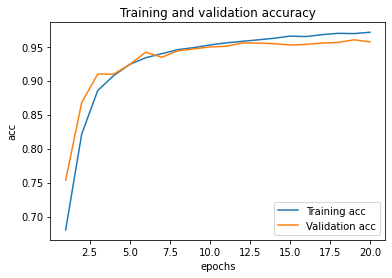

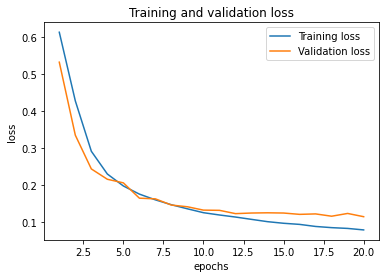

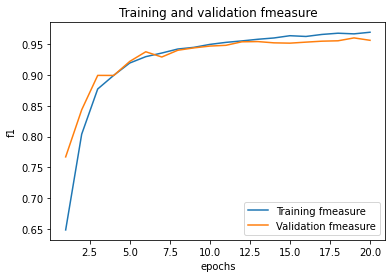

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 344,897
Trainable params: 344,897
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
296/296 [==============================] - 23s 68ms/step - loss: 0.6624 - acc: 0.6398 - f1: 0.4965 - val_loss: 0.5986 - val_acc: 0.6889 - val_f1: 0.6064
Epoch 2/20
296/296 [==============================] - 20s 68ms/step - loss: 0.5356 - acc: 0.7636 - f1: 0.7506 - val_loss: 0.4500 - val_acc: 0.8221 -

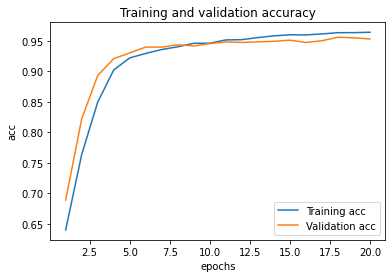

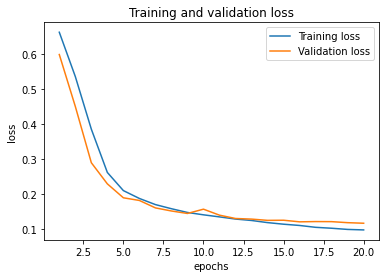

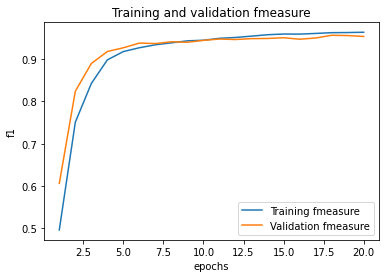

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 gru (GRU)                   (None, 64)                18816     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 338,881
Trainable params: 338,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
296/296 [==============================] - 22s 64ms/step - loss: 0.6905 - acc: 0.6176 - f1: 0.4862 - val_loss: 0.6868 - val_acc: 0.7003 - val_f1: 0.7118
Epoch 2/20
296/296 [==============================] - 18s 62ms/step - loss: 0.6629 - acc: 0.7880 - f1: 0.7788 - val_loss: 0.6021 - val_acc: 0.8478 -

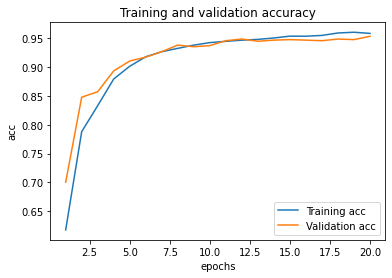

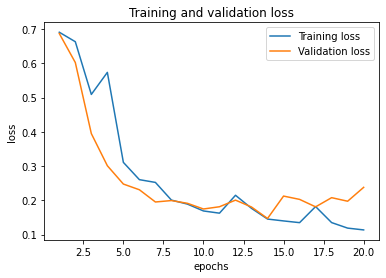

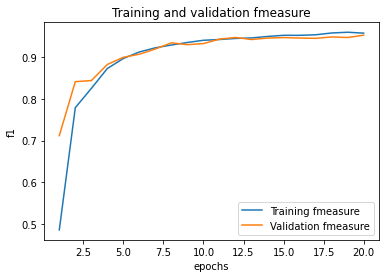

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.optimizers import RMSprop
from keras import backend as K

humor_lines = pd.read_pickle('humorous_oneliners.pickle')
proverb_record = pd.read_pickle('proverbs.pickle')
wikipedia = pd.read_pickle('wiki_sentences.pickle')
reuter_record = pd.read_pickle('reuters_headlines.pickle')

texts = []
labels = []
negative = proverb_record + wikipedia + reuter_record
np.random.shuffle(negative)
print('Number. of 1 samples', len(humor_lines))
for line in humor_lines:
    texts.append(line)
    labels.append(1)
negative = negative[:len(humor_lines)]
print('Number. of 0 samples', len(negative))
for line in negative:
    texts.append(line)
    labels.append(0)
print('Total number of samples', len(texts))
max_length = 50
max_number_of_words = 10000
tokenizer = Tokenizer(num_words=max_number_of_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))
data = pad_sequences(sequences, maxlen=max_length)
labels = np.array(labels)
print('Shape of data tensor:', data.shape)
print('Shape of labels tensor:', labels.shape)

indice = np.arange(data.shape[0])
np.random.shuffle(indice)
data = data[indice]
labels = labels[indice]
emb_idx = {}

f = open('glove.6B.100d.txt')
for line in f:
    class_vectors = line.split()
    word = class_vectors[0]
    coefficient = np.asarray(class_vectors[1:], dtype='float32')
    emb_idx[word] = coefficient
f.close()

print('Found %s word vectors:' % len(emb_idx))

embedding_dimensions = 100

embedding_matrix = np.zeros((max_number_of_words, embedding_dimensions))
for word, index in word_index.items():
    if index < max_number_of_words:
        embedding_vector = emb_idx.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

def f1(y_true, y_prediction):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_prediction)
    recall = recall(y_true, y_prediction)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

def plot_result(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    f1 = history.history['f1']
    val_f1 = history.history['val_f1']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, label='Training acc')
    plt.plot(epochs, val_acc, label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('epochs')
    plt.ylabel('acc')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.figure()
    plt.plot(epochs, f1, label='Training fmeasure')
    plt.plot(epochs, val_f1, label='Validation fmeasure')
    plt.title('Training and validation fmeasure')
    plt.xlabel('epochs')
    plt.ylabel('f1')
    plt.legend()
    plt.show()


# 1. Simple RNN layer + embedding layer

model = Sequential()
model.add(Embedding(max_number_of_words, 32))
model.add(SimpleRNN(64, dropout=0.1))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc', f1])
history = model.fit(data, labels, epochs=20, batch_size=32, validation_split=0.1)
plot_result(history)

# 2. Using LSTM layer + embedding layer

model = Sequential()
model.add(Embedding(max_number_of_words, 32))
model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc', f1])
history = model.fit(data, labels, epochs=20, batch_size=32, validation_split=0.1)
plot_result(history)

# 3. Using GRU layer + embedding layer
model = Sequential()
model.add(Embedding(max_number_of_words, 32))
model.add(GRU(64, activation='relu', dropout=0.1, recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc', f1])
history = model.fit(data, labels, epochs=20, batch_size=32, validation_split=0.1)
plot_result(history)


